In [4]:
from KalmanFilter import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dt = 1
# dynamic model for position, speed, acceleration
F = np.array(
    [[1, dt, 0.5*dt**2], 
     [0, 1, dt], 
     [0, 0, 1]]
)
# direct measurement of position, speed, acceleration
H = np.array(
    [[1, 0, 0], 
     [0, 1, 0], 
     [0, 0, 1]]
)

# dynamic model cov matrix
Q = np.array(
     [[0.05, 0.05, 0.0],
      [0.05, 0.05, 0.0],
      [0.0, 0.0, 0.0]]
)
    
# measurement cov matrix
R = np.array(
     [[0.05, 0, 0.0],
      [0, 0.05, 0.0],
      [0.0, 0.0, 0.05]]
)

# initial state cov matrix
P0 = np.array(
     [[0.05, 0, 0.0],
      [0, 0.05, 0.0],
      [0.0, 0.0, 0.05]]
)

# initial state
x0 = np.array([1,0,0])

# command model
B = np.array([0])

# define noise-free measurements for each time step
t = np.arange(0,100, dt)
x = np.sin(2*np.pi/10.0 * t)
v = 2*np.pi/10.0 * np.cos(2*np.pi/10.0 * t)
a = - (2*np.pi/10.0)**2 * np.sin(2*np.pi/10.0 * t)
# add some noise on measurements and concatenate all component into z vector
x_meas = x + np.random.normal(0, 1, 100)
v_meas = v + np.random.normal(0, 0.5, 100)
a_meas = a + np.random.normal(0, 0.25, 100)
z = np.concatenate(
    (x_meas[np.newaxis], 
     v_meas[np.newaxis], 
     a_meas[np.newaxis])
)


KF = KalmanFilter(
    x0=x0, 
    P0=P0, 
    F=F, 
    Q=Q, 
    R=R, 
    H=H, 
    B=B
)

In [21]:
# Run Kalman filter for as many iteration as there are measurements
X_pred = []
X_hat = []
for i in range(z.shape[1]):
    # prediction based on dynamic model
    x_pred = KF.predict()
    # update based on measurement
    x_hat = KF.update(z[:, i])
    
    X_pred.append(x_pred)
    X_hat.append(x_hat)
X_pred = np.array(X_pred)
X_hat = np.array(X_hat)

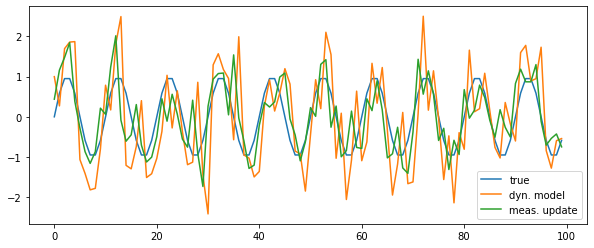

In [22]:
# plot results
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, label="true")
ax.plot(X_pred[:, 0], label="dyn. model")
ax.plot(X_hat[:, 0], label="meas. update")
ax.legend()
plt.show()